# EXPLORE Data Science Academy Classification Hackathon

Kaggle Challenge 2021 - Happy ndlovu

---

### Predict Overview:South African Language Identification



<a id="cont"></a>

## Table of Contents

<a href=#one> Introduction</a>

<a href=#two> Importing Packages</a>

<a href=#three> Loading Data</a>

<a href=#four> Preprocessing</a>

<a href=#five> Modeling</a>

<a href=#six> Conclusion</a>

<a href=#seven> Submission</a>

# Introduction

Create a Machine Learning model that is able to classify which language the a taxt belong to,
in short its the Natural Language processing(NLP).

Natural language processing (NLP) describes the interaction between human language and computers.
It's a technology that many people use daily and has been around for years, but is often taken for granted.
A few examples of NLP that people use every day are: Spell check

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in.
This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
# classification model
from sklearn.naive_bayes import MultinomialNB
# Performance Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Importing data

In [ ]:
data = pd.read_csv("train_set.csv")

# Data preprocessing

In [ ]:
data.head(5)# viewing the data

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [ ]:
data['lang_id'].unique() #checking the number of language the data has

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

### 

In [ ]:
data["lang_id"].value_counts() #count the number of centans per language

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

### Separating Independent and Dependent features

In [ ]:
X = data["text"]
y = data["lang_id"]

### Label Encoding

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

### Text Preprocessing

In [ ]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

### Bag of Words

In [153]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.astype(np.uint8) #channging datype to uint8, reducing the size




array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# Modeling


### Split Training and Validation Sets

In [154]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Model Training and Prediction

In [155]:
model = MultinomialNB()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

### Model Evaluation

In [ ]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)
# Accuracy is : 0.9992424242424243

Accuracy is : 0.9992424242424243


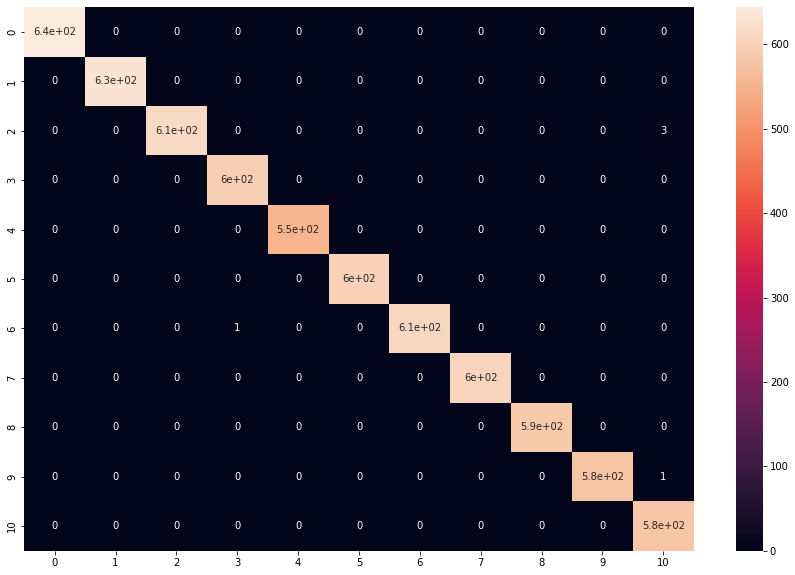

In [ ]:
# Create Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
results = pd.DataFrame(report).transpose()

# A confusion matrix is used to evaluate the performance of the model
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# A Classification report is used to measure the quality of predictions from a classification algorithm
results

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,644.000000
1,1.000000,1.000000,1.000000,629.000000
2,1.000000,0.995122,0.997555,615.000000
3,0.998322,1.000000,0.999160,595.000000
4,1.000000,1.000000,1.000000,552.000000
5,1.000000,1.000000,1.000000,601.000000
6,1.000000,0.998363,0.999181,611.000000
7,1.000000,1.000000,1.000000,605.000000
8,1.000000,1.000000,1.000000,588.000000
9,1.000000,0.998273,0.999136,579.000000


### Predicting some of data
Here is where the model perfomance can be tested.

In [ ]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     replace_values = {'ssw' : 'siswati', 'eng' : 'english', 'ven' : 'venda','zul':'Zulu',
                    'nbl':'ndebele','afr':'Africans','xho':'xhosa', 'sot':'sotho','tso':'tsonga', 'nso':'nothen sotho','tsn':'tswana' } 
     print("The langauge is in",replace_values [lang[0]]) # printing the language

In [ ]:
# English
predict("inhluthu") #inset the statement in side the bracket and you will get what language the statements belong

The langauge is in sotho


# Submission
Creating a submission file to be submitted to kaggle with specified columns

In [ ]:
data[['lang_id','text']].to_csv('submission.csv', index=False)